## kmeans

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
# from scipy.misc import imread
import imageio
from scipy.spatial.distance import cdist

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import cv2

## kmeans

In [13]:

def kmeans_segmentation(im, features, num_clusters):

    #initialization
    times=0
    h,w,_ = im.shape
    pixel_clusters = np.zeros((h*w),dtype=int)
    M  = features.shape[0]

    # randomly choose
    idx_random = np.random.choice(M, num_clusters, replace=False) 
    centroids = features[idx_random]
    
    # print(centroids)

    new_centriods = np.zeros_like(centroids)
    while True:
        # 
        for i in range(features.shape[0]):
            idx = np.argsort(np.linalg.norm(features[i] - centroids,axis=1)) #new_centriods
            pixel_clusters[i] = idx[0]
        print(idx[0])
        print(idx[-1])

        for j in range(num_clusters):
           
            candidate = np.where(pixel_clusters == j)[0]
            # print(candidate)
            # print(j)
            new_centriods[j] = np.sum(features[candidate],axis=0)/candidate.shape[0] #算means 也可以用means
            # print(new_centriods[j])
            # print(j)

        
        if np.allclose(new_centriods,centroids) and times >=50: # allclose 至少做超過50次 當中心點都不動時返回 pixel_clusters
            print("做了 %d 的次數" %(times))
            return pixel_clusters.reshape(h,w)

        else:
            centroids = new_centriods.copy()
            times+=1


    
"""
平均像素點 同 cluster points 值, output 同樣cluster 時 output 該 cluster 平均像素點
"""

def draw_clusters_on_image(im, pixel_clusters):
    num_clusters = int(pixel_clusters.max()) + 1
    
    average_color = np.zeros((num_clusters, 3))
    
    cluster_count = np.zeros(num_clusters)

    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            c = pixel_clusters[i,j]
            cluster_count[c] += 1

            average_color[c, :] += im[i, j, :]

    for c in range(num_clusters):
        average_color[c,:] /= float(cluster_count[c])

    out_im = np.zeros_like(im)
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            c = pixel_clusters[i,j]
            out_im[i,j,:] = average_color[c,:]

    return out_im



if __name__ == '__main__':

    # Change these parameters to see the effects of K-means and Meanshift
    # num_clusters = [5, 10, 15, 20]
    num_clusters = [5]
    # bandwidths = [0.3]

    for filename in ['2-image', '2-masterpiece']:
        img = imageio.imread('%s.jpg' % filename)
        # img = imread('data/%s.jpeg' % filename)

        # Create the feature vector for the images
        features = np.zeros((img.shape[0] * img.shape[1], 5))
        for row in range(img.shape[0]):
            for col in range(img.shape[1]):
                features[row*img.shape[1] + col, :] = np.array([row, col,img[row, col, 0], img[row, col, 1], img[row, col, 2]])
        features_normalized = features / features.max(axis = 0)

        # Part I: Segmentation using K-Means
        for nc in num_clusters:
            clustered_pixels = kmeans_segmentation(img, features_normalized, nc)
            cluster_im = draw_clusters_on_image(img, clustered_pixels)
            

            imageio.imsave('output/K-means_with_%d_clusters_on_%s.jpg' % (int(nc), filename),cluster_im)
            # imageio.imsave('2/output/clusters_on.jpg',cluster_im)
            plt.imshow(cluster_im)
            plt.title('K-means with %d clusters on %s.jpg' % (int(nc), filename))
            plt.show()


        # Part II: Segmentation using Meanshift
        # for bandwidth in bandwidths:
        #     clustered_pixels = meanshift_segmentation(img, features_normalized, bandwidth)
        #     cluster_im = draw_clusters_on_image(img, clustered_pixels)
        #     plt.imshow(cluster_im)
        #     plt.title('Meanshift with bandwidth %.2f on %s.jpeg' % (bandwidth, filename))
        #     plt.show()


C:\Users\MPLAB\AppData\Local\Temp\ipykernel_14152\806512478.py:83: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('%s.jpg' % filename)


0
1
0
1
0
2
0
2
3
2
3
2
3
2
3
2
3
2
3
2


KeyboardInterrupt: 

In [ ]:
# print(features.shape)
# print(features[0])
# print(features[1])
# y=np.zeros((4),dtype=int)
# print(y)

In [ ]:
# def show_rgbspace(img):
#     r, g, b = cv2.split(img)
#     fig = plt.figure()
#     axis = fig.add_subplot(1, 1, 1, projection="3d")
#     pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
#     norm = colors.Normalize(vmin=-1.,vmax=1.)
#     norm.autoscale(pixel_colors)
#     pixel_colors = norm(pixel_colors).tolist()
#     axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
#     axis.set_xlabel("Red")
#     axis.set_ylabel("Green")
#     axis.set_zlabel("Blue")
#     plt.show()

## kmeans ++

C:\Users\MPLAB\AppData\Local\Temp\ipykernel_2280\1243102385.py:103: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('%s.jpg' % filename)


3681
230399
9612


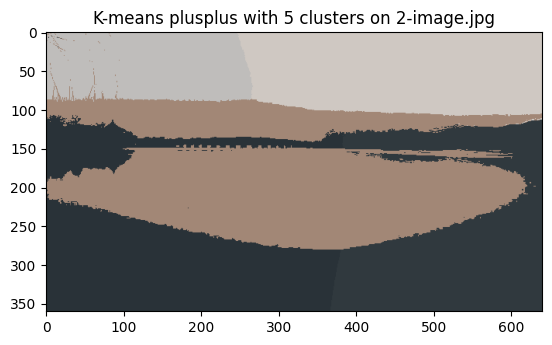

230399
229760
41319
2560
102100
230399
9612
230399


C:\Users\MPLAB\AppData\Local\Temp\ipykernel_2280\1243102385.py:88: RuntimeWarning: invalid value encountered in divide
  average_color[c,:] /= float(cluster_count[c])


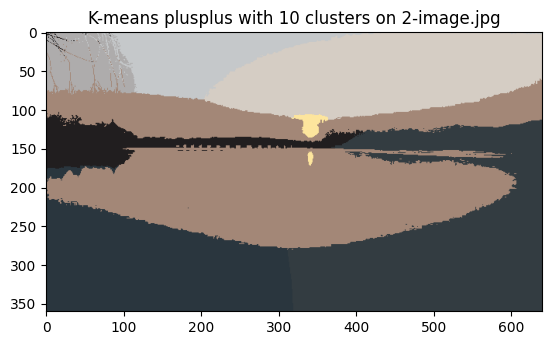

230399
9612
97163
102100
2560
102100
230399
9612
230399
9612
230399
102100
2560


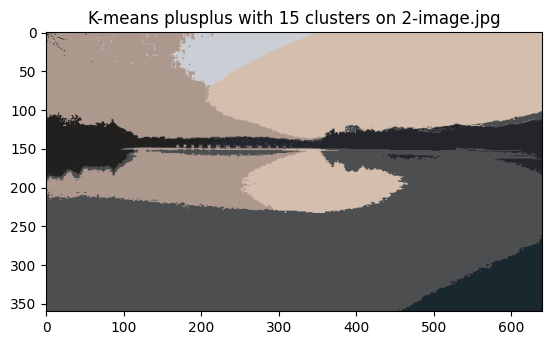

93765
86901
10386


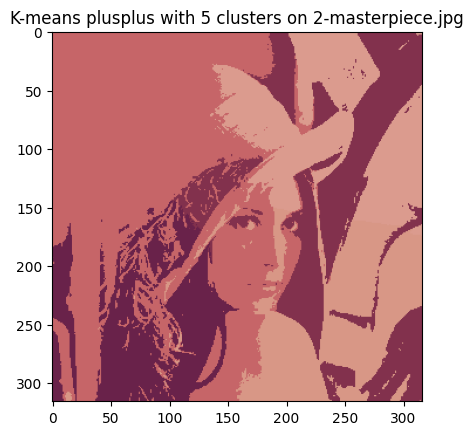

12599
90695
23955
13902
97657
99540
254
13902


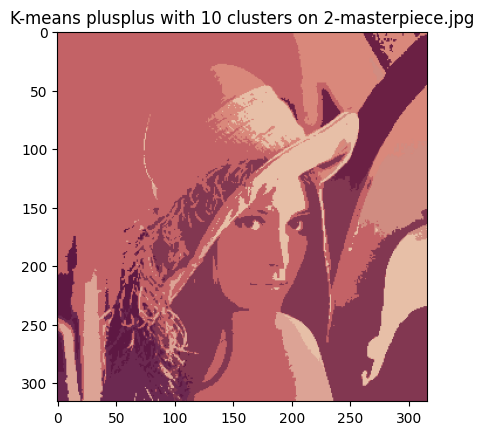

90695
53160
99540
254
13902
97657
13902
61499
90695
17881
99540
254
13902


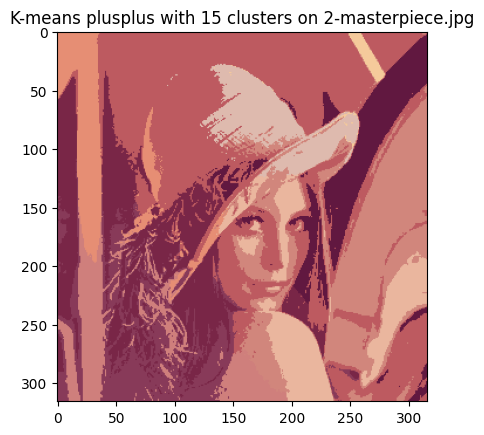

In [3]:
def kmeans_plusplus_segmentation(im, features, num_clusters):

    #initialization
    times=0
    h,w,_ = im.shape
    pixel_clusters = np.zeros((h*w),dtype=int)
    M  = features.shape[0]
    
    tmp_nc = 2 
    dis_num=[] 
    num_tmp=0 # 計算過後的值
    dis_tmp=0 #  儲存暫時
    times=0

    # randomly choose
    idx_random = np.random.choice(M, num_clusters, replace=False) 

    centroids = features[idx_random[:2]]
    # print(centroids)

    new_centriods = np.zeros_like(centroids)

    # 找群中心
    while tmp_nc <= num_clusters-1:
        dis_tmp=0
        # num_tmp=0
        dis_num=0
        times=0
        for k in range(features.shape[0]):#features.shape[0]
            dis_num = np.sqrt((features[k] - centroids)**2)
            print(dis_num)
            for j in range(tmp_nc):
                for i in range(5):
                    num_tmp += dis_num[j][i]
            
            if num_tmp > dis_tmp:
                dis_tmp = num_tmp
                times = k
                # print(num_tmp)
            num_tmp=0
        print(times) # 找到第二個之後第三個點最遠在哪
        # print(features[times])
        # print(centroids)
        centroids = np.append(centroids,features[times])
        centroids = centroids.reshape((tmp_nc+1,5))
        tmp_nc+=1
    
    # print(centroids)

    # while True:
    for i in range(features.shape[0]):
        idx = np.argsort(np.linalg.norm(features[i] - centroids,axis=1)) #new_centriods
        pixel_clusters[i] = idx[0]
        # for j in range(tmp_nc):
        #     candidate = np.where(pixel_clusters == j)[0]
        #     new_centriods[j] = np.sum(features[candidate],axis=0)/candidate.shape[0] #算means 也可以用means
    # print(new_centriods)
    return pixel_clusters.reshape(h,w)
        
        # if np.allclose(new_centriods,centroids) and times >=50: # allclose 至少做超過50次 當中心點都不動時返回 pixel_clusters
        #     print("做了 %d 的次數" %(times))
        #     return pixel_clusters.reshape(h,w)

        # else:
        #     centroids = new_centriods.copy()
        #     times+=1
    
    
"""
平均像素點 同 cluster points 值, output 同樣cluster 時 output 該 cluster 平均像素點
"""

def draw_clusters_on_image(im, pixel_clusters):
    num_clusters = int(pixel_clusters.max()) + 1
    
    average_color = np.zeros((num_clusters, 3))
    
    cluster_count = np.zeros(num_clusters)

    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            c = pixel_clusters[i,j]
            cluster_count[c] += 1

            average_color[c, :] += im[i, j, :]

    for c in range(num_clusters):
        average_color[c,:] /= float(cluster_count[c])

    out_im = np.zeros_like(im)
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            c = pixel_clusters[i,j]
            out_im[i,j,:] = average_color[c,:]

    return out_im



if __name__ == '__main__':
    num_clusters = [5,10,15]
    for filename in ['2-image','2-masterpiece']:#, '2-masterpiece'
        img = imageio.imread('%s.jpg' % filename)

        # Create the feature vector for the images
        features = np.zeros((img.shape[0] * img.shape[1], 5))
        for row in range(img.shape[0]):
            for col in range(img.shape[1]):
                features[row*img.shape[1] + col, :] = np.array([row, col,img[row, col, 0], img[row, col, 1], img[row, col, 2]])
        features_normalized = features / features.max(axis = 0)

        # Part I: Segmentation using K-Means
        for nc in num_clusters:
            clustered_pixels = kmeans_plusplus_segmentation(img, features_normalized, nc)
            cluster_im = draw_clusters_on_image(img, clustered_pixels)
            

            imageio.imsave('output/K-means_plusplus_with_%d_clusters_on_%s.jpg' % (int(nc), filename),cluster_im)
            # imageio.imsave('2/output/clusters_on.jpg',cluster_im)
            plt.imshow(cluster_im)
            plt.title('K-means plusplus with %d clusters on %s.jpg' % (int(nc), filename))
            plt.show()


## meanshift

In [1]:

'''
MEANSHIFT_SEGMENTATION: Image segmentation using meanshift
Arguments:
    im - the image being segmented, given as a (H, W, 3) ndarray

    features - ndarray of size (#pixels, M) that are the feature vectors
        associated with each pixel. The #pixels are arranged in such a way
        that calling reshape((H,W)) will correspond to the image im.

    bandwidth - A parameter that determines the radius of what participates
       in the mean computation

Returns:
    pixel_clusters - H by W matrix where each index tells what 
    "cluster the pixel belongs to". 
    The clusters must range from 0 to N-1, where N is the total number of clusters.

The meanshift algorithm can be done in the following steps:
(1) Keep track of an array whether we have seen each pixel or not.
Initialize it such that we haven't seen any.
(2) While there are still pixels we haven't seen do the following:
    - Pick a random pixel we haven't seen
    - Until convergence (mean is within 1 of the bandwidth of the old
        mean), mean shift. 
        The output of this step will be a mean vector.
        For each iteration of the meanshift, if another pixel is within the
        bandwidth circle (in feature space), then that pixel should also be
        marked as seen
    - 
    - 
(3) After finding all clusters, assign every pixel to the nearest cluster
in feature space.

To perform mean shift:
    - Once a random pixel has been selected, pretend it is the current mean
        vector.
    - Find the feature vectors of the other pixels that are within the
        bandwidth distance from the mean feature vector according to EUCLIDEAN
        distance (in feature space).
    - Compute the mean feature vector among all feature vectors within the
        bandwidth.
    - Repeat until convergence, using the newly computed mean feature vector
        as the current mean feature vector.
'''
def draw_clusters_on_image(im, pixel_clusters):
    num_clusters = int(pixel_clusters.max()) + 1
    
    average_color = np.zeros((num_clusters, 3))
    
    cluster_count = np.zeros(num_clusters)

    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            c = pixel_clusters[i,j]
            cluster_count[c] += 1

            average_color[c, :] += im[i, j, :]

    for c in range(num_clusters):
        average_color[c,:] /= float(cluster_count[c])

    out_im = np.zeros_like(im)
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            c = pixel_clusters[i,j]
            out_im[i,j,:] = average_color[c,:]

    return out_im
def meanshift_segmentation(im, features, bandwidth):
    
    #initialization
    h,w,_ = im.shape
    record = np.ones([h*w],dtype=int)

    cluster_means = np.empty((0,features.shape[1]))

    pixel_clusters = np.zeros(features.shape[0],dtype=int)
    
    idx_rand_no_seen_record = []
    idx_i = 0
    timer=0

    while np.sum(record) > 0:
        
        # randomly choose one feature from haven't seen
        idx = np.where(record > 0)[0]
        # print(idx)
        idx_rand_no_seen = idx[np.random.choice(idx.shape[0], 1)]

        # print(idx_rand_no_seen) # 找一些點大概不到 50點 就可以收斂

        mean = features[idx_rand_no_seen].flatten()# flatten() 少一維度 
        # print(mean) 
        flag = True
        
        # mean shift
        while flag:
            dis = np.linalg.norm(features - mean,axis=1)
            idx_within = np.where(dis < bandwidth)[0] # 返回 index

            # import pdb;pdb.set_trace()
            new_mean = np.sum(features[idx_within],axis=0) / idx_within.shape[0]
        #     If the output mean vector from the mean shift step is
        #       sufficiently close (within half a bandwidth) to another cluster
        #       center, say it's part of that cluster
            if np.linalg.norm(new_mean-mean) < bandwidth:  #norm 相減 平方 sum 再開根號
                flag = False
                # idx_i+=1
                # print(timer)
                # timer+=1
            else:
                # If it's not sufficiently close to any other cluster center, make a new cluster
                mean = new_mean.copy()
                # print("bad")
            record[idx_within] = 0
            
        mean_dis = np.linalg.norm(cluster_means - new_mean,axis=1)

        # 每一個 cluster_means 隨著找到的 idx_rand_no_seen 的點 當成 cluster 的 中心算 mean 
        # print(mean_dis)

        """
        把 h 範圍內 點都統一 ,且算完的值 給 mean_dis
        取 最小 mean_dis[0] ,找真正有用的cluster
        """
        if mean_dis.size > 0 and mean_dis[np.argsort(mean_dis)[0]] < bandwidth / 2:
            # pixel_clusters[idx_within] = mean_dis[np.argsort(mean_dis)[0]] # 是給 index
            pixel_clusters[idx_within] = np.argsort(mean_dis)[0]
            # print(pixel_clusters[idx_within])
            # print(np.argsort(mean_dis)[0])
            # print(timer)# 3次
            # timer+=1
        else:
            cluster_means = np.vstack((cluster_means,new_mean)) # 矩陣矩陣堆疊 直方向 
            # print(timer)# 29次
            # timer+=1

            # idx_within 的值 = 總共數量的值 ,全部該次的idx_within 都同個id 然後給 plot 再算idx_within 全部的平均
            pixel_clusters[idx_within] = cluster_means.shape[0] 
    # print(cluster_means.shape[0])
    # print(idx_rand_no_seen_record)
    
    return pixel_clusters.reshape(h,w)
    
def show_rgbspace(img):
    r, g, b = cv2.split(img)
    fig = plt.figure()
    axis = fig.add_subplot(1, 1, 1, projection="3d")
    pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
    norm = colors.Normalize(vmin=-1.,vmax=1.)
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors).tolist()
    axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
    axis.set_xlabel("Red")
    axis.set_ylabel("Green")
    axis.set_zlabel("Blue")
    plt.show()

if __name__ == '__main__':

    # Change these parameters Meanshift
    bandwidths = [0.3,0.5,0.6]

    for filename in ['2-image', '2-masterpiece']:#, '2-masterpiece'
        img = imageio.imread('%s.jpg' % filename)
        # img = imread('data/%s.jpeg' % filename)

        # Create the feature vector for the images
        features = np.zeros((img.shape[0] * img.shape[1], 5))
        for row in range(img.shape[0]):
            for col in range(img.shape[1]):
                features[row*img.shape[1] + col, :] = np.array([row, col,img[row, col, 0], img[row, col, 1], img[row, col, 2]])
        features_normalized = features / features.max(axis = 0)

        # Part II: Segmentation using Meanshift
        for bandwidth in bandwidths:

            clustered_pixels = meanshift_segmentation(img, features_normalized, bandwidth)
            cluster_im = draw_clusters_on_image(img, clustered_pixels)

            # for i in range(3):
            imageio.imsave('output/Meanshift_with_bandwidth_%.2f_on_%s.jpg' % (bandwidth,filename),cluster_im)
            plt.imshow(cluster_im)
            plt.title('Meanshift with bandwidth %.2f on %s.jpg' % (bandwidth, filename))
            plt.show()

# show original

for filename in ['2-image', '2-masterpiece']:#, '2-masterpiece'
    print("original: %s.jpg" % filename)
    img_1 = imageio.imread('%s.jpg' % filename)
    show_rgbspace(img_1)
    for bandwidth in bandwidths:
        img = imageio.imread('output/Meanshift_with_bandwidth_%.2f_on_%s.jpg' % (bandwidth,filename))
        

        
        print('Meanshift with bandwidth %.2f on %s.jpg' % (bandwidth, filename))
        show_rgbspace(img)

# img = imageio.imread('2-image.jpg')
# show_rgbspace(img)

NameError: name 'imageio' is not defined

In [ ]:
# def draw_clusters_on_image(im, pixel_clusters):
#     num_clusters = int(pixel_clusters.max()) + 1
    
#     average_color = np.zeros((num_clusters, 3))
    
#     cluster_count = np.zeros(num_clusters)

#     for i in range(im.shape[0]):
#         for j in range(im.shape[1]):
#             c = pixel_clusters[i,j]
#             cluster_count[c] += 1

#             average_color[c, :] += im[i, j, :]

#     for c in range(num_clusters):
#         average_color[c,:] /= float(cluster_count[c])

#     out_im = np.zeros_like(im)
#     for i in range(im.shape[0]):
#         for j in range(im.shape[1]):
#             c = pixel_clusters[i,j]
#             out_im[i,j,:] = average_color[c,:]

#     return out_im

# def show_rgbspace(img):
#     r, g, b = cv2.split(img)
#     fig = plt.figure()
#     axis = fig.add_subplot(1, 1, 1, projection="3d")
#     pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
#     norm = colors.Normalize(vmin=-1.,vmax=1.)
#     norm.autoscale(pixel_colors)
#     pixel_colors = norm(pixel_colors).tolist()
#     axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
#     axis.set_xlabel("Red")
#     axis.set_ylabel("Green")
#     axis.set_zlabel("Blue")
#     plt.show()






## 比較 cost k-means 與 meanshift

In [8]:
def draw_clusters_on_image(im, pixel_clusters):
    num_clusters = int(pixel_clusters.max()) + 1
    
    average_color = np.zeros((num_clusters, 3))
    
    cluster_count = np.zeros(num_clusters)

    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            c = pixel_clusters[i,j]
            cluster_count[c] += 1

            average_color[c, :] += im[i, j, :]

    for c in range(num_clusters):
        average_color[c,:] /= float(cluster_count[c])

    out_im = np.zeros_like(im)
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            c = pixel_clusters[i,j]
            out_im[i,j,:] = average_color[c,:]

    return out_im
def meanshift_segmentation(im, features, bandwidth):
    
    #initialization
    h,w,_ = im.shape
    record = np.ones([h*w],dtype=int)
    cluster_means = np.empty((0,features.shape[1]))
    pixel_clusters = np.zeros(features.shape[0],dtype=int)
    
    idx_rand_no_seen_record = []
    idx_i = 0
    timer=0

    while np.sum(record) > 0:
        
        # randomly choose one feature from haven't seen
        idx = np.where(record > 0)[0]
        idx_rand_no_seen = idx[np.random.choice(idx.shape[0], 1)]
        mean = features[idx_rand_no_seen].flatten()# flatten() 少一維度 
        flag = True
        # mean shift
        while flag:
            dis = np.linalg.norm(features - mean,axis=1)
            idx_within = np.where(dis < bandwidth)[0] # 返回 index
            new_mean = np.sum(features[idx_within],axis=0) / idx_within.shape[0]

            if np.linalg.norm(new_mean-mean) < bandwidth:  #norm 相減 平方 sum 再開根號
                flag = False
            else:
                mean = new_mean.copy()
            record[idx_within] = 0
            
        mean_dis = np.linalg.norm(cluster_means - new_mean,axis=1)
        if mean_dis.size > 0 and mean_dis[np.argsort(mean_dis)[0]] < bandwidth / 2:
            pixel_clusters[idx_within] = np.argsort(mean_dis)[0]

        else:
            cluster_means = np.vstack((cluster_means,new_mean)) # 矩陣矩陣堆疊 直方向 
            pixel_clusters[idx_within] = cluster_means.shape[0] 
    return pixel_clusters.reshape(h,w)

if __name__ == '__main__':

    # Change these parameters Meanshift
    bandwidths = [0.3]

    for filename in ['2-image', '2-masterpiece']:#, '2-masterpiece'
        img = imageio.imread('%s.jpg' % filename)
        # img = imread('data/%s.jpeg' % filename)

        # Create the feature vector for the images
        features = np.zeros((img.shape[0] * img.shape[1], 5))
        for row in range(img.shape[0]):
            for col in range(img.shape[1]):
                features[row*img.shape[1] + col, :] = np.array([row, col,img[row, col, 0], img[row, col, 1], img[row, col, 2]])
        features_normalized = features / features.max(axis = 0)

        # Part II: Segmentation using Meanshift
        for bandwidth in bandwidths:

            clustered_pixels = meanshift_segmentation(img, features_normalized, bandwidth)
            cluster_im = draw_clusters_on_image(img, clustered_pixels)
            # imageio.imsave('output/Meanshift_with_bandwidth_%.2f_on_%s.jpg' % (bandwidth,filename),cluster_im)


/var/folders/92/9s4mr7zj4bl6cj567n_mfqc00000gn/T/ipykernel_26503/1291948495.py:71: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('%s.jpg' % filename)
/var/folders/92/9s4mr7zj4bl6cj567n_mfqc00000gn/T/ipykernel_26503/1291948495.py:16: RuntimeWarning: invalid value encountered in divide
  average_color[c,:] /= float(cluster_count[c])


In [2]:
def kmeans_segmentation(im, features, num_clusters):

    #initialization
    times=0
    h,w,_ = im.shape
    pixel_clusters = np.zeros((h*w),dtype=int)
    M  = features.shape[0]

    # randomly choose
    idx_random = np.random.choice(M, num_clusters, replace=False) 
    centroids = features[idx_random]
    

    new_centriods = np.zeros_like(centroids)
    while True:
        # 
        for i in range(features.shape[0]):
            idx = np.argsort(np.linalg.norm(features[i] - centroids,axis=1)) #new_centriods
            pixel_clusters[i] = idx[0]

        for j in range(num_clusters):
           
            candidate = np.where(pixel_clusters == j)[0]
            # print(candidate)
            # print(j)
            new_centriods[j] = np.sum(features[candidate],axis=0)/candidate.shape[0] #算means 也可以用means
            # print(new_centriods[j])
            # print(j)
        
        # print(candidate)
        # print(candidate.shape)

        
        if np.allclose(new_centriods,centroids) and times >=50: # allclose 至少做超過50次 當中心點都不動時返回 pixel_clusters
            print("做了 %d 的次數" %(times))
            return pixel_clusters.reshape(h,w)

        else:
            centroids = new_centriods.copy()
            times+=1
    
def draw_clusters_on_image(im, pixel_clusters):
    num_clusters = int(pixel_clusters.max()) + 1
    
    average_color = np.zeros((num_clusters, 3))
    
    cluster_count = np.zeros(num_clusters)

    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            c = pixel_clusters[i,j]
            cluster_count[c] += 1

            average_color[c, :] += im[i, j, :]

    for c in range(num_clusters):
        average_color[c,:] /= float(cluster_count[c])

    out_im = np.zeros_like(im)
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            c = pixel_clusters[i,j]
            out_im[i,j,:] = average_color[c,:]

    return out_im

if __name__ == '__main__':
    num_clusters = [5]
    for filename in ['2-image', '2-masterpiece']:
        img = imageio.imread('%s.jpg' % filename)
        # img = imread('data/%s.jpeg' % filename)

        # Create the feature vector for the images
        features = np.zeros((img.shape[0] * img.shape[1], 5))
        for row in range(img.shape[0]):
            for col in range(img.shape[1]):
                features[row*img.shape[1] + col, :] = np.array([row, col,img[row, col, 0], img[row, col, 1], img[row, col, 2]])
        features_normalized = features / features.max(axis = 0)

        # Part I: Segmentation using K-Means
        for nc in num_clusters:
            clustered_pixels = kmeans_segmentation(img, features_normalized, nc)
            cluster_im = draw_clusters_on_image(img, clustered_pixels)
            

            # imageio.imsave('output/K-means_with_%d_clusters_on_%s.jpg' % (int(nc), filename),cluster_im)
            # plt.imshow(cluster_im)
            # plt.title('K-means with %d clusters on %s.jpg' % (int(nc), filename))
            # plt.show()


C:\Users\MPLAB\AppData\Local\Temp\ipykernel_14152\1121095173.py:70: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('%s.jpg' % filename)


KeyboardInterrupt: 

In [6]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# SIFT interest point detection and matching
def sift_detection_and_matching(image1, image2, point, threshold):

    img1 = cv2.imread(image1)
    img2 = cv2.imread(image2)

    # SIFT interest point detection
    sift = cv2.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)


    # SIFT feature matching
    match1=[]
    dis = np.zeros(np.shape(des1))
    for i in range(des1.shape[0]):
        if np.std(des1[i,:]) != 0:
            dis = des2-des1[i,:]
            dis = np.linalg.norm(dis, axis=1)
            arrange = np.argsort(dis).tolist()
            if dis[arrange[0]]/dis[arrange[1]] <= threshold:
                match1.append((i,arrange[0]))

    match2=[]
    for i in range(des2.shape[0]):
        if np.std(des2[i,:]) != 0:
            dis=des1-des2[i,:]
            dis=np.linalg.norm(dis, axis=1)
            arrange =np.argsort(dis).tolist()
            if dis[arrange[0]]/dis[arrange[1]] <= threshold:
                match2.append((arrange[0],i))
            
    match = list(set(match1).intersection(set(match2)))
    matches = [cv2.DMatch(i[0], i[1], 1) for i in match]

    # Plot the detected interest points and point correspondences
    draw_params = dict(matchColor = (0,255,0),
                        singlePointColor = (0,165,255),
                        flags = 0)
    
    matching = cv2.drawMatches(img1, kp1, img2, kp2, matches[:point], None,**draw_params)
    cv2.imwrite("sift-%s.jpg" %(image1), matching)


def select_keypoints_in_bbox(descriptors, keypoints, bbox):
    xmin, ymin, xmax, ymax = bbox
    indices = [i for i, pt in enumerate(keypoints) if 
            pt[0] >= xmin and pt[0] <= xmax and pt[1] >= ymin and pt[1] <= ymax]
    return descriptors[indices, :], keypoints[indices, :]


def ransac_homography_transformationgraphy(image1, image2, obj_bbox, num_iterations, threshold):

    img1 = plt.imread(image1)
    img2 = plt.imread(image2)
    # SIFT interest point detection
    sift = cv2.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)
    



        
    kpArray1 = []
    for i in range(len(kp1)):
        kpArray1.append(kp1[i].pt)
    

    kpArray1 = np.array(kpArray1)

    kpArray2 = []
    for i in range(len(kp2)):
        kpArray2.append(kp2[i].pt)
    

    kpArray2 = np.array(kpArray2)
    # obj_bbox = [134, 13, 277, 207]




    des2, kpArray2, = select_keypoints_in_bbox(des2, kpArray2, obj_bbox)

    n = des1.shape[0]
    matches = np.empty((0,2), int)

    for i in range(n):
        feature = des1[i]
        distances = np.linalg.norm(des2 - feature,axis=1)
        idx = np.argsort(distances)
        

        if distances[idx[0]] < threshold * distances[idx[1]]:
            match = np.array([i,idx[0]]).reshape(1,2)
            matches = np.vstack((matches,match))


    n = matches.shape[0]


    seq = [i for i in range(n)]
    valid_sample = [i for i in range(4,n)]

    
    inliers = np.array([])
    H_best = np.zeros((3,3))





    
    pts_homo = np.ones((kpArray1.shape[0],3))
    pts_homo[:,:-1] = kpArray1[:,:2]
    # print(pts_homo)
    

    for _ in range(num_iterations):
        
        # valid sample subset 
        sample_length = random.sample(valid_sample, 1)[0]
        sample = random.sample(seq,sample_length)

        
        candit = matches[sample]


        # 1st image coordinates
        pts = pts_homo[candit[:,0]]
        pts_prime = kpArray2[candit[:,1],:2]
        
        A = np.zeros((sample_length*2,9))
        
        # homography
        for i in range(sample_length):


            A[i*2,3:6]  = -pts[i]
            A[i*2,6:]   = pts[i] * pts_prime[i,1]
            A[i*2+1,:3] = pts[i]
            A[i*2+1,6:] = -pts[i] * pts_prime[i,0]

        
        u,s,vh = np.linalg.svd(A)
        H = vh[-1].reshape(3,3)
        
        # reprojection error
        reprojection_threshold = 10
        pts_reproj_homo = H.dot(pts_homo[matches[:,0]].T)
        pts_reproj_inhomo = pts_reproj_homo[:-1,:] / pts_reproj_homo[-1,:]
        error = np.linalg.norm(kpArray2[matches[:,1],:2]-pts_reproj_inhomo.T,axis=1)
        inlier_idx = np.where(error < reprojection_threshold)[0]
        
        if len(inliers) < len(inlier_idx):
            inliers = inlier_idx



    fig = plt.figure()
    new_im = np.zeros((max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1], max(img1.shape[2], img2.shape[2])),dtype=np.uint8)
    new_im[:img1.shape[0], :img1.shape[1], :img1.shape[2]] = img1
    new_im[:img2.shape[0], img1.shape[1]:, :img2.shape[2]] = img2
    plt.imshow(new_im)
    plt.autoscale(False)


    for m in matches:
        ind1, ind2 = m
        plt.plot([kpArray1[ind1,0], img1.shape[1]+kpArray2[ind2,0]], [kpArray1[ind1,1], kpArray2[ind2,1]],  color='lime', linewidth=1.0)
    plt.savefig('ransac-%s.jpg' %(image1)) 

       
    # return inliers, H_best

def comput_obj_bbox(image, points):

    image = cv2.imread(image)

    img = image.copy()


    x = []; y = []
    for i in range(len(points)):
        x.append(points[i, 0])
        y.append(points[i, 1])
    
    x_min = min(x); x_max = max(x)
    y_min = min(y); y_max = max(y)

    obj_bbox = [x_min, y_min, x_max, y_max]

    cv2.polylines(img,[points],True,(0,255,0),2)



    cv2.imwrite("img.jpg" , img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    name = "img.jpg"
    return name, obj_bbox 

if __name__ == '__main__': 
    
    image = "1-image.jpg"
    image1 = "1-book1.jpg"
    image2 = "1-book2.jpg"
    image3 = "1-book3.jpg"

    
    pts1 = np.array([[146,247], [321,361], [248, 456], [138, 455], [34, 357]])
    pts2 = np.array([[387,197], [510, 312], [334, 455], [219, 302]])
    pts3 = np.array([[134,34], [266,13], [277, 186], [163, 206]])


    sift_detection_and_matching(image1, image, point=1000, threshold=0.6)
    sift_detection_and_matching(image2, image, point=1000, threshold=0.4)
    sift_detection_and_matching(image3, image, point=1000, threshold=0.8)

    img1, obj_bbox1 = comput_obj_bbox(image, pts1)
    ransac_homography_transformationgraphy(image1, img1, obj_bbox1, num_iterations = 1000, threshold = 0.6)

    img2, obj_bbox2 = comput_obj_bbox(image, pts2)
    ransac_homography_transformationgraphy(image2, img2, obj_bbox2, num_iterations = 1000, threshold = 0.4)

    img3, obj_bbox3 = comput_obj_bbox(image, pts3)
    ransac_homography_transformationgraphy(image3, img3, obj_bbox3, num_iterations = 1000, threshold = 0.8)


    


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\features2d\src\sift.dispatch.cpp:477: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'cv::SIFT_Impl::detectAndCompute'
